In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [51]:
np.random.seed(3)
n = 35
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])
print(X.shape,y.shape)

(35, 1) (35,)


In [31]:
clf = MLPRegressor(alpha=0.01, hidden_layer_sizes = (10,), max_iter = 100000, 
                 activation = 'logistic', verbose = False, learning_rate = 'adaptive')
a = clf.fit(X, y)

In [32]:
x_ = np.linspace(-15, 15, 300) # define axis

pred_x = np.reshape(x_, [300, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_

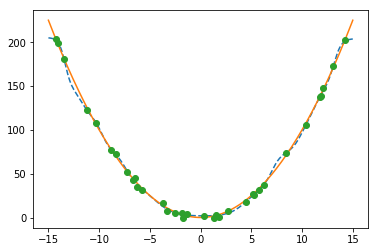

In [33]:
plt.plot(pred_x,pred_y,'--',x_,x_**2,'-',x,y,'o')
plt.show()

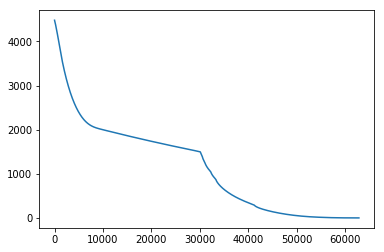

In [34]:
plt.plot(clf.loss_curve_)
plt.show()

In [81]:
fname = './THSCPM1b.txt'
f = open(fname,'r')
data = f.read()
f.close()
data = data[data.find('upperLimits'):].split(':')[1]
data = eval(data,{'GeV' : 1.,'pb' : 1.})
x = [pt[0][0][0] for pt in data]
y = [pt[1] for pt in data]

In [168]:
x_train = x[:]
y_train = y[:]
x_train = np.reshape(x_train,[len(x_train),1])
y_train = np.reshape(y_train,[len(y_train),1])
xScaler = StandardScaler()
yScaler = StandardScaler()
xScaler.fit(x_train)
yScaler.fit(y_train)
x_train = xScaler.transform(x_train)
y_train = yScaler.transform(y_train)
y_train = np.reshape(y_train,[len(y_train),])

In [212]:
clf = MLPRegressor(alpha=0.01, hidden_layer_sizes = (10,10,), max_iter = 100000, 
                 activation = 'logistic', verbose = False, learning_rate = 'adaptive')
a = clf.fit(x_train, y_train)

In [213]:
x_ = np.linspace(min(x), max(x), 100)
pred_x = np.reshape(x_, [len(x_), 1])
pred_x = xScaler.transform(pred_x)
pred_y = clf.predict(pred_x)

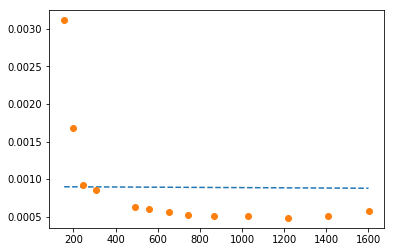

In [214]:
xvals = xScaler.inverse_transform(pred_x)
yvals = yScaler.inverse_transform(pred_y)
plt.plot(xvals,yvals,'--',x,y,'o')
plt.show()

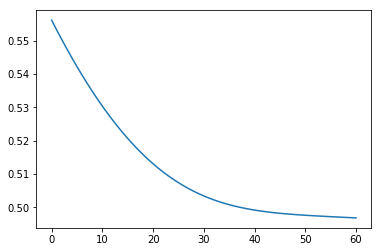

In [215]:
plt.plot(clf.loss_curve_)
plt.show()